
=== Neural Network ===
Predictions: [0, 1, 2, 0, 0, 2]
Confusion Matrix:
 [[3 0 0]
 [0 1 0]
 [0 0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



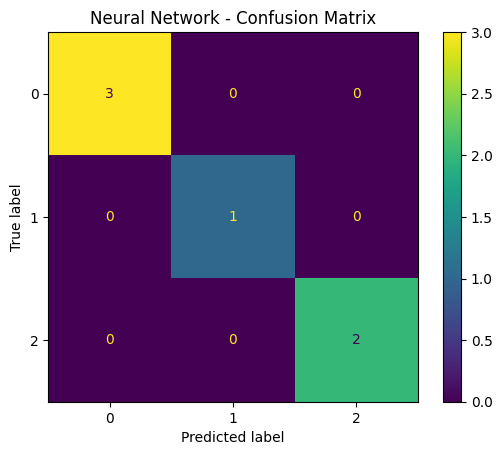


=== Random Forest ===
Predictions: [0, 1, 2, 0, 1, 2]
Confusion Matrix:
 [[2 1 0]
 [0 1 0]
 [0 0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         2

    accuracy                           0.83         6
   macro avg       0.83      0.89      0.82         6
weighted avg       0.92      0.83      0.84         6



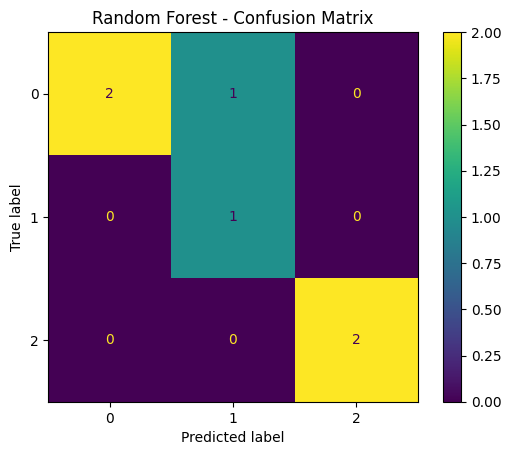


=== XGBoost ===
Predictions: [0, 1, 2, 1, 1, 2]
Confusion Matrix:
 [[1 2 0]
 [0 1 0]
 [0 0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      1.00      0.50         1
           2       1.00      1.00      1.00         2

    accuracy                           0.67         6
   macro avg       0.78      0.78      0.67         6
weighted avg       0.89      0.67      0.67         6



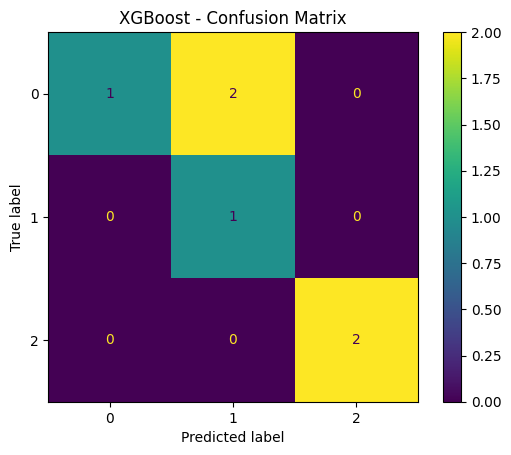

In [2]:
# Step 0: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Step 1: Load data and manually label
data = {
    'trial': range(1,21),
    'accuracy_percent': [98,95,92,85,88,76,81,90,94,100,67,73,89,96,82,78,91,86,99,84],
    'reaction_time_s':[0.92,1.05,1.2,1.75,1.4,2.1,1.95,1.3,1.1,0.85,2.45,2,1.6,0.98,1.85,2.05,1.25,1.55,0.88,1.7],
    'cluster_label':[0,0,1,1,1,2,2,1,0,0,2,2,1,0,1,2,1,1,0,1]
}
df = pd.DataFrame(data)

# Step 2: Features and labels
X = df[['accuracy_percent','reaction_time_s']]
y = df['cluster_label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4a: Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=5000, learning_rate_init=0.001, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

# Step 4b: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 4c: XGBoost
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Step 5: Display Confusion Matrices (Plots + Text)
models = {
    "Neural Network": (y_test, y_pred_nn),
    "Random Forest": (y_test, y_pred_rf),
    "XGBoost": (y_test, y_pred_xgb)
}

for name, (y_true, y_pred) in models.items():
    print(f"\n=== {name} ===")
    # Text output
    print("Predictions:", y_pred.tolist())
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    
    # Plot
    disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))
    disp.plot(cmap='viridis')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
